# Importing libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore 

# Uploading the data

In [ ]:
df=pd.read_csv("water_quality_classifier_mean_state.csv")

In [ ]:
#afficher les 5 premiére lignes
df.head(5)

,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,WQI clf
0,6.7,7.5,203.0,21.947222,0.1,11.0,27.0,0
1,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,0
2,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,0
3,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,0
4,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,0


In [ ]:
#afficher la taille du dataframe (nb_lignes,nb_colonnes)
df.shape

(1679, 8)

In [ ]:
df[df['WQI clf']==4]

,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,WQI clf
1002,6.50,5.80,67.00,0.400,0.540,123.0,520.0,4
1459,6.10,3.10,738.00,5.500,2.730,32.0,45.0,4
1626,6.40,3.05,605.00,5.067,4.800,18.0,45.0,4
1667,7.00,6.00,63.00,0.300,0.500,120.0,500.0,4
1668,6.20,3.00,733.00,5.300,2.700,31.0,43.0,4
1669,6.00,3.05,734.00,5.330,2.680,30.5,45.0,4
1670,6.60,5.75,66.50,0.338,0.520,121.5,517.0,4
1671,6.48,5.68,67.03,0.340,0.527,122.5,450.0,4
1672,5.80,3.30,600.00,5.000,4.400,16.0,40.0,4
1673,6.20,3.15,590.00,5.100,4.600,17.0,43.0,4


In [ ]:
n_unsuitable=(df['WQI clf']==0).sum()
n_very_poor=(df['WQI clf']==1).sum()
n_poor=(df['WQI clf']==2).sum()
n_good=(df['WQI clf']==3).sum()
n_excellent=(df['WQI clf']==4).sum()

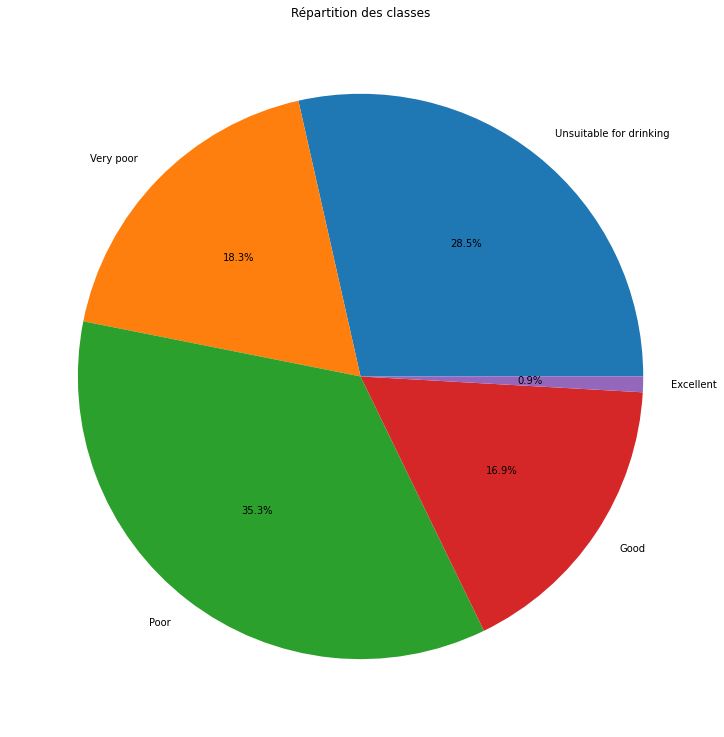

In [ ]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,Dropout
from tensorflow.keras.utils import to_categorical

# Charger les données
data = df

In [ ]:
cols_to_drop=["WQI clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["WQI clf"].values

In [ ]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Redimensionner les données pour les convolutions 1D
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Créer le modèle CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation="softmax"))

# Compiler le modèle
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Entraîner le modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)
print(history.history['accuracy'])
print(history.history['loss'])

Epoch 1/100
21/21 [==============================] - 2s 29ms/step - loss: 28.4440 - accuracy: 0.3366 - val_loss: 9.6453 - val_accuracy: 0.3482
Epoch 2/100
21/21 [==============================] - 0s 15ms/step - loss: 9.9820 - accuracy: 0.3380 - val_loss: 6.7814 - val_accuracy: 0.4077
Epoch 3/100
21/21 [==============================] - 0s 17ms/step - loss: 5.4733 - accuracy: 0.3574 - val_loss: 3.6151 - val_accuracy: 0.3899
Epoch 4/100
21/21 [==============================] - 0s 15ms/step - loss: 3.9654 - accuracy: 0.3745 - val_loss: 2.0159 - val_accuracy: 0.3690
Epoch 5/100
21/21 [==============================] - 0s 17ms/step - loss: 3.5369 - accuracy: 0.4125 - val_loss: 2.9784 - val_accuracy: 0.4256
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss: 2.9455 - accuracy: 0.4162 - val_loss: 1.7213 - val_accuracy: 0.4940
Epoch 7/100
21/21 [==============================] - 0s 23ms/step - loss: 1.8667 - accuracy: 0.4423 - val_loss: 1.5452 - val_accuracy: 0.4107
Epoch

In [ ]:
# Évaluer le modèle sur les données de test
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

11/11 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.7708
Test loss: 0.6442581415176392
Test accuracy: 0.7708333134651184


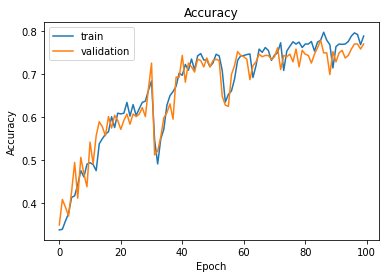

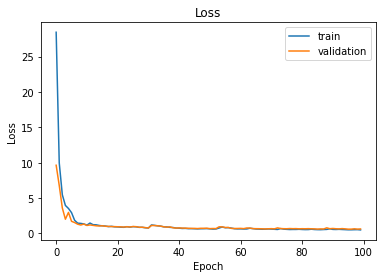

In [ ]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()